# Mini Project

- california housing 데이터셋을 이용하여 선형회귀 적용ㄱ
- 단순 선형회귀를 통해 각 피쳐들을 이용하여 집값 예측하자.

(Source : https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

### 1. 데이터 및 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing

x = fetch_california_housing(as_frame=True)['data']
y = fetch_california_housing(as_frame = True)['target']

display(x)
display(y)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
# data, target 합치기

data = pd.concat([x,y],axis=1)
display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 2. data preprocessing

- 1. 결측치 확인
- 2. feature selection

In [ ]:
data.info() #dtype이 float64에 null 없음 확인(object 였다면 - 이런걸로 채워있을 수도 있긴함)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
#필요없는 column 제거
# 응 다필요해

## 3. EDA
- feature distribution
- target distribution

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='MedInc', ylabel='Count'>

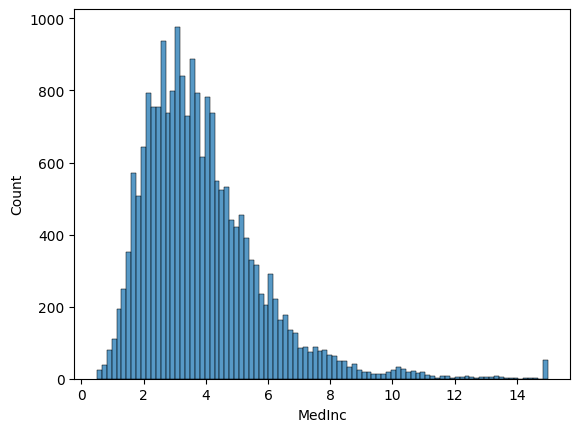

In [ ]:
# feature distribution
sns.histplot(data = data, x="MedInc") #중위 소득

<Axes: xlabel='HouseAge', ylabel='Count'>

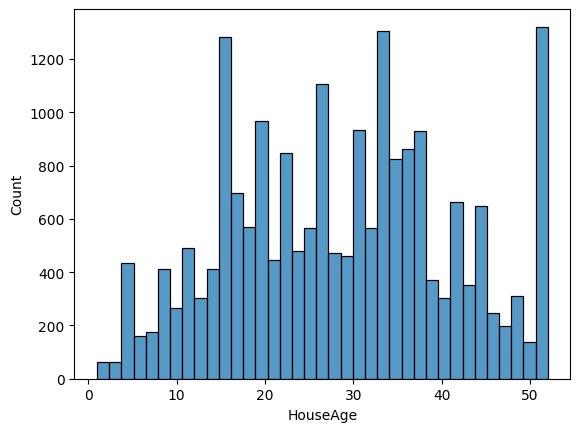

In [ ]:
sns.histplot(data = data, x="HouseAge")

<Axes: xlabel='AveRooms', ylabel='Count'>

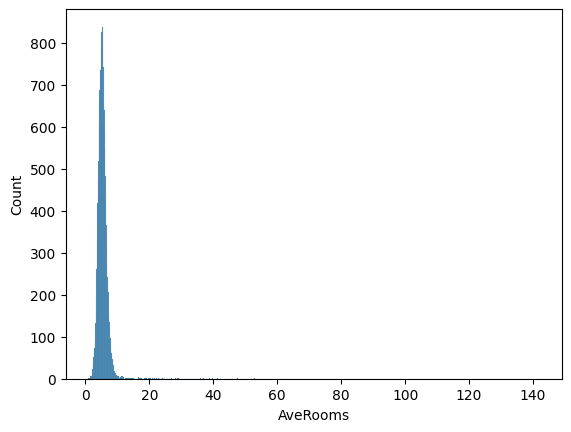

In [ ]:
sns.histplot(data = data, x="AveRooms")

<Axes: xlabel='AveBedrms', ylabel='Count'>

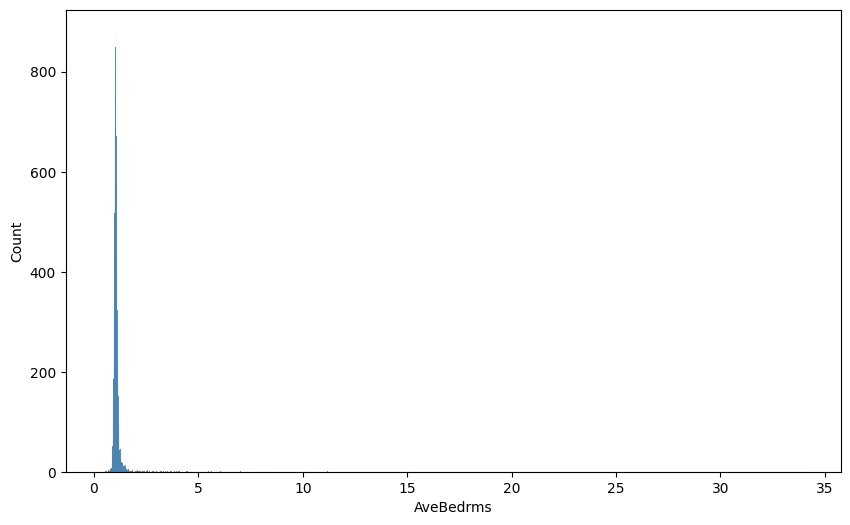

In [ ]:
plt.figure(figsize=(10,6))
#fig,axes=plt.subplots(1,2)
sns.histplot(data = data, x="AveBedrms")
#sns.boxplot(data=data,ax=axes[1])

#plt.tight_layout()

<Axes: >

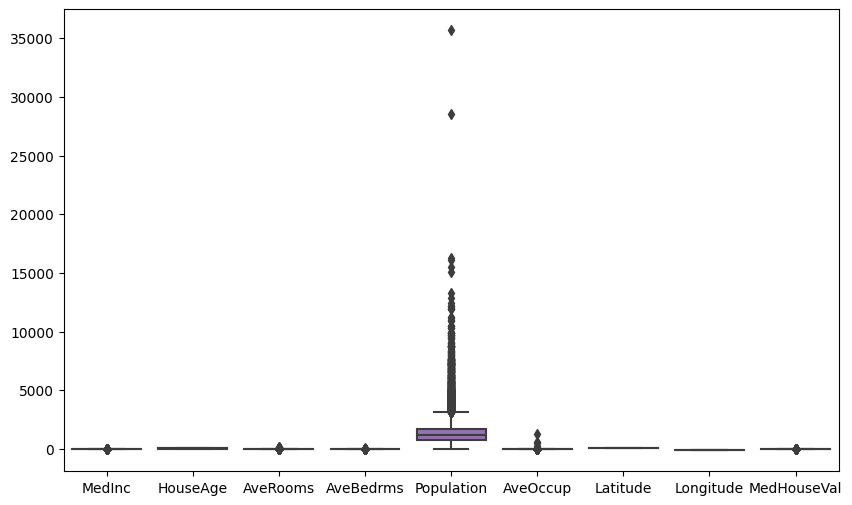

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data)

<Axes: >

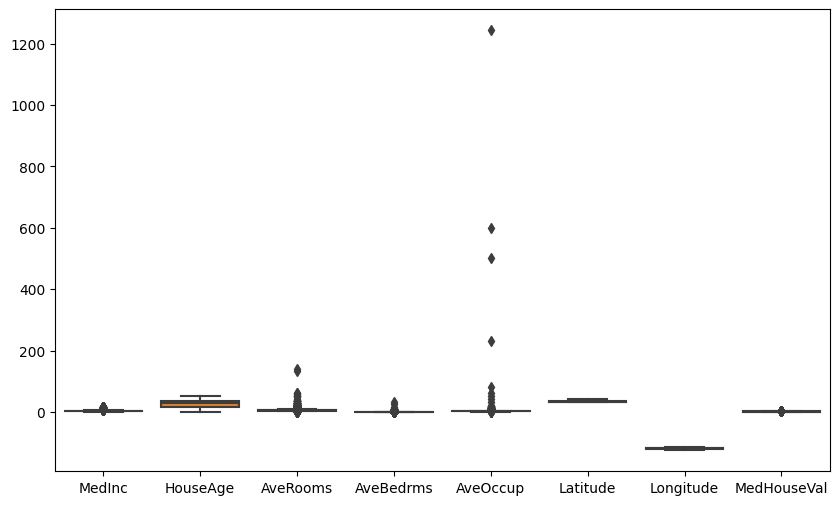

In [ ]:
#population outlier가 넘 심하니 빼고 보자
plt.figure(figsize=(10,6))
sns.boxplot(data = data.loc[:,["MedInc","HouseAge","AveRooms","AveBedrms","AveOccup","Latitude","Longitude","MedHouseVal"]])

<Axes: >

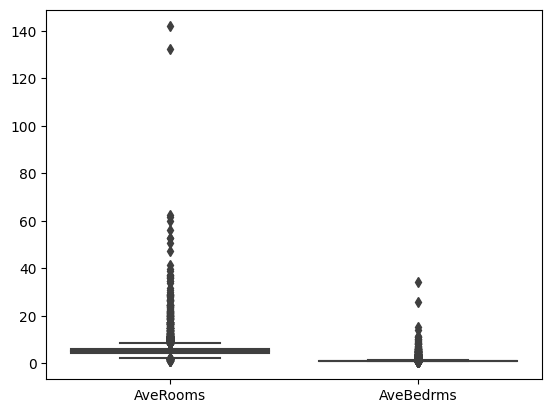

In [ ]:
sns.boxplot(data=data.loc[:,["AveRooms","AveBedrms"]])

<Axes: xlabel='Longitude', ylabel='Count'>

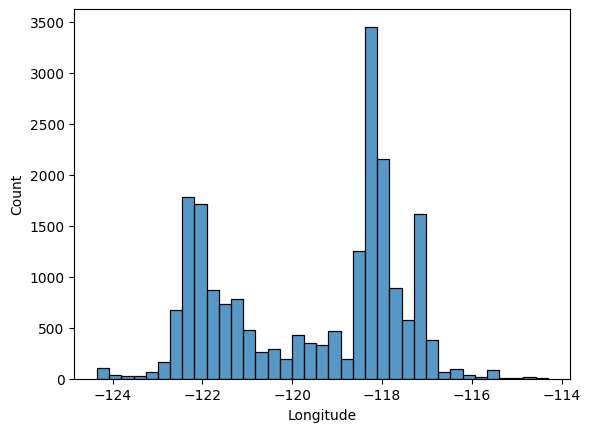

In [ ]:
sns.histplot(data=data["Longitude"])

<Axes: xlabel='MedHouseVal', ylabel='Count'>

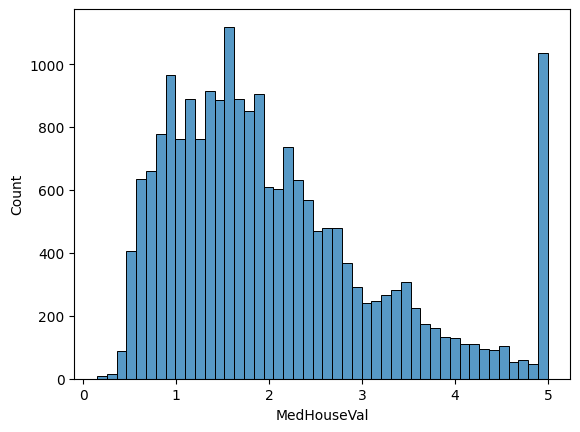

In [ ]:
#target distribution
sns.histplot(data=data["MedHouseVal"])
# == sns.histplot(data=data,x="MedHouseVal")

<Axes: >

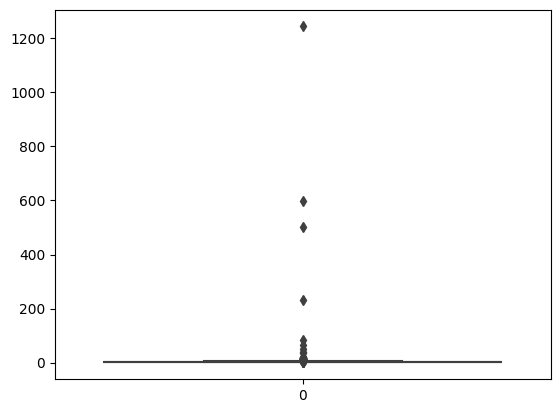

In [ ]:
sns.boxplot(data=data["AveOccup"]) #200 넘어가는 애들은 버리자

<Axes: xlabel='AveRooms', ylabel='Count'>

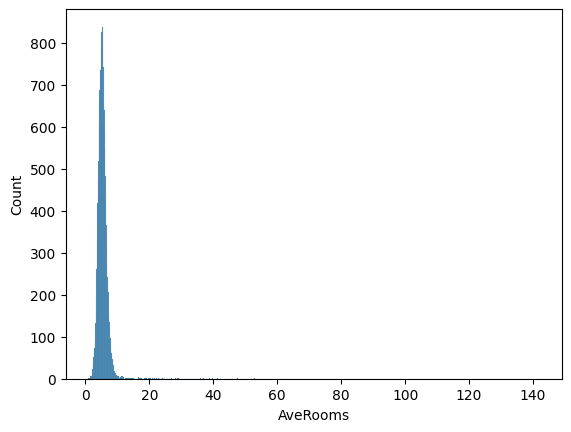

In [ ]:
sns.histplot(data=data["AveRooms"])
# 이것도 마찬가지로 대충 20넘는 애들 제거 ㄱ

In [ ]:
data.loc[data.AveRooms>100] # 회귀 돌려보면서 나중에 확정하면 됨 일단은 extreme한 100 이상 녀석들만 제외 ㄱ
#1914,1979 두개 제거


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [ ]:
data.loc[data.AveOccup >200] # 입주율인가 뭐지
# 4개 제거

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


In [ ]:
# AveBedrms, Longitude column 제거
data = data.drop(index=[1914,1979,3364,13034,16669,19006]) #remove outlier
data = data.drop(columns=["AveBedrms","Longitude"]) #remove collinearity(다중 공산성)
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


<Axes: >

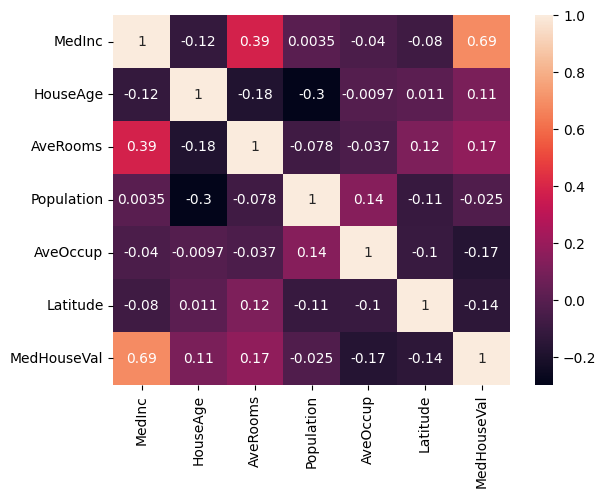

In [ ]:
sns.heatmap(data.corr(),annot =True)
# AveRooms & AveBedrooms 상관관계 매우 높 / Latitude & Longitude도 마찬가지
# -> 회귀에서의 다중공산성 문제해결 위해 둘 중 하나만 선택 ㄱ

## 4. Training
- train-test split
- standardization
- model training
- hyper-parameter tuning
- evaluation

In [ ]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

#트테트테
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0xC0FFEE)
# 0xC0FFEE 를 기준으로 랜덤하게 나눈다.
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#validation
# 6:2:2 = train : validation : test
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0xC0FFEE)
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)
(12384, 8) (4128, 8) (4128, 8) (12384,) (4128,) (4128,)


In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# 학습을 위한 라이브러리 세팅

#1. Linear Regression
#2. Lasso
#3. XGBoost
#4. LightGBM

from sklearn.linear_model import LinearRegression   # 1. Linear Regression
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM

from sklearn.metrics import mean_squared_error # 평가지표

In [26]:
## training
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 =LGBMRegressor()

reg.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)
reg4.fit(X_train,y_train)
reg5.fit(X_train,y_train)

pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)


print("1. Linear Regression\t, train=%.4f, val=%.4f" % (mse_train, mse_val))
print("2. Lasso\t\t, train=%.4f, val=%.4f" % (mse_train2, mse_val2))
print("3. Ridge\t\t, train=%.4f, val=%.4f" % (mse_train3, mse_val3))
print("4. XGBoost\t\t, train=%.4f, val=%.4f" % (mse_train4, mse_val4))
print("5. LightGBM\t\t, train=%.4f, val=%.4f" % (mse_train5, mse_val5))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 12384, number of used features: 8
[LightGBM] [Info] Start training from score 2.075508
1. Linear Regression	, train=0.5336, val=0.5241
2. Lasso		, train=1.3490, val=1.2857
3. Ridge		, train=0.5336, val=0.5241
4. XGBoost		, train=0.0603, val=0.2247
5. LightGBM		, train=0.1474, val=0.2167


In [ ]:
# Hyper-parameter tuning
# 1. Human Search
# 2. Grid Search(GridSearchCV) : 주어진 hp의 조합을 모두 돌려보는 방식.
# 3. Bayesian Optimization(hyperopt, optuna, ...) : hyper-parameter를 최적화하는 베이지안 방식을 사용.

# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" : [3, 4, 5, 6, 7, -1], # 6
    "learning_rate" : [0.1, 0.01, 0.05], # 3
    "n_estimators" : [50, 100, 200] # 3
} # 6x3x3 = 54

gcv = GridSearchCV(reg5, param_grid, scoring='neg_mean_squared_error', verbose=1)
gcv.fit(X_train, y_train)
#print(gcv.cv_results_)
print(gcv.best_estimator_)
print(gcv.best_params_)

## 5. Test(Prediction)

In [27]:
# prediction!
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)

In [28]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result5))

---------- Linear Regression ---------
MSE in training: 0.5028
---------- Lasso ---------
MSE in training: 1.3254
---------- Ridge ---------
MSE in training: 0.5028
---------- XGBoost ---------
MSE in training: 0.2240
---------- LightGBM ---------
MSE in training: 0.2151


In [30]:
# 하이퍼 파라미터 수정이후 다시

# prediction!
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)

In [31]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result5))

---------- Linear Regression ---------
MSE in training: 0.5028
---------- Lasso ---------
MSE in training: 1.3254
---------- Ridge ---------
MSE in training: 0.5028
---------- XGBoost ---------
MSE in training: 0.2240
---------- LightGBM ---------
MSE in training: 0.2151
